**DR**
455894
https://github.com/astronaut505/montec

Expected Value of P/L: 0.22158094141167012
Standard Deviation of P/L: 15.778958824008491


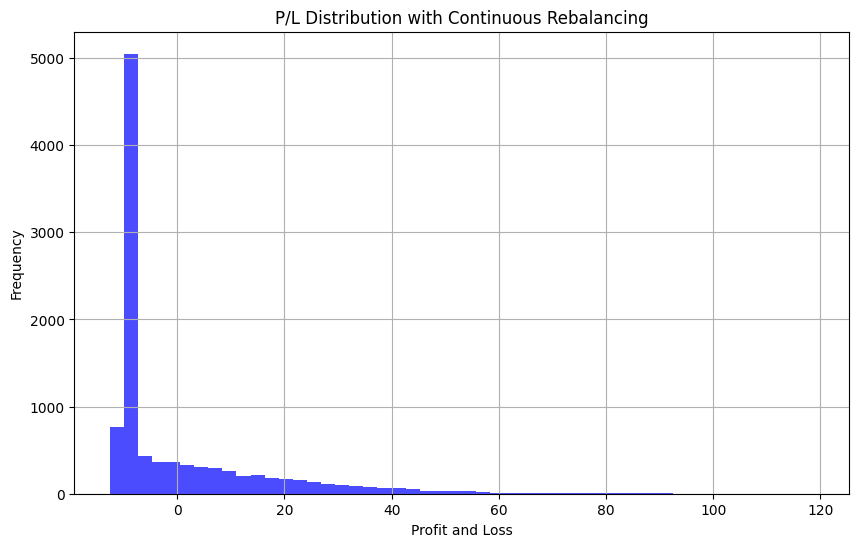

In [1]:
#**Question 1:**
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
initial_stock_price = 100
implied_volatility = 0.2
actual_volatility = 0.23
risk_free_rate = 0
dividend_yield = 0
T = 1  # 1 year
n_paths = 10000
n_steps = 1000
dt = T / n_steps

#<--- function to calculate delta of a call option
def option_delta(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

#<--- monte Carlo simulation for stock price paths
np.random.seed(0)
stock_paths = np.zeros((n_paths, n_steps + 1))
stock_paths[:, 0] = initial_stock_price
for t in range(1, n_steps + 1):
    z = np.random.standard_normal(n_paths)
    stock_paths[:, t] = stock_paths[:, t - 1] * np.exp((risk_free_rate - dividend_yield - 0.5 * actual_volatility ** 2) * dt + actual_volatility * np.sqrt(dt) * z)

#<--- delta-hedging strategy with continuous rebalancing
PnL = np.zeros(n_paths)
for i in range(n_paths):
    delta_portfolio = 0
    for t in range(n_steps):
        delta = option_delta(stock_paths[i, t], initial_stock_price, T - t * dt, risk_free_rate, dividend_yield, implied_volatility)
        stock_price_change = stock_paths[i, t + 1] - stock_paths[i, t]
        PnL[i] += delta_portfolio * stock_price_change
        delta_portfolio = delta  # Update the delta of the portfolio

#<--- calc. expecte value and standard deviation of PnL
expected_PnL = np.mean(PnL)
std_dev_PnL = np.std(PnL)

#<--- results
print(f"Expected Value of P/L: {expected_PnL}")
print(f"Standard Deviation of P/L: {std_dev_PnL}")

#<--- plot a histogram of PnL
plt.figure(figsize=(10, 6))
plt.hist(PnL, bins=50, color='blue', alpha=0.7)
plt.title("P/L Distribution with Continuous Rebalancing")
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



### Restults for question 1: Outcomes of Continuous Zero-Delta Rebalancing

The continuous zero-delta rebalancing yields an expected P/L of **$0.22**, suggesting a marginal average gain. However, the strategy entails significant risk, as reflected by a standard deviation of **$15.78**, indicating a wide dispersion of potential outcomes around the mean. Let's check for next strategy.

Expected Value of P/L with 100 Rehedgings: -0.174465401469347
Standard Deviation of P/L with 100 Rehedgings: 15.700399422620658


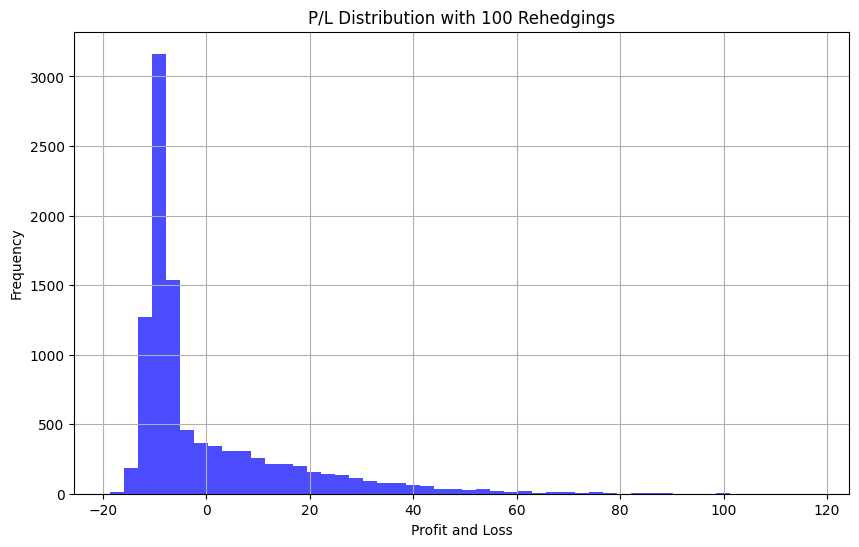

In [2]:
#Question 2 (a):
#<--- parameters for the rehedging strategy
rehedge_steps = 100  # Reducing rehedgings to 100
transaction_cost = 0.001  # 0.1%

#<--- delta-hedging with reduced rehedging (100 steps)
PnL_reduced_100 = np.zeros(n_paths)
for i in range(n_paths):
    delta_portfolio = 0
    for t in range(0, n_steps, n_steps // rehedge_steps):  # Equally spaced rehedgings
        delta = option_delta(stock_paths[i, t], initial_stock_price, T - t * dt, risk_free_rate, dividend_yield, implied_volatility)
        stock_price_change = stock_paths[i, t + n_steps // rehedge_steps] - stock_paths[i, t]
        PnL_reduced_100[i] += delta_portfolio * stock_price_change
        delta_change = delta - delta_portfolio
        transaction_cost_penalty = abs(delta_change * stock_paths[i, t]) * transaction_cost
        PnL_reduced_100[i] -= transaction_cost_penalty
        delta_portfolio = delta

#<--- calculating expected value and standard deviation of PnL for reduced rehedging (100 steps)
expected_PnL_100 = np.mean(PnL_reduced_100)
std_dev_PnL_100 = np.std(PnL_reduced_100)

#<--- results and plot histogram
print(f"Expected Value of P/L with 100 Rehedgings: {expected_PnL_100}")
print(f"Standard Deviation of P/L with 100 Rehedgings: {std_dev_PnL_100}")

plt.figure(figsize=(10, 6))
plt.hist(PnL_reduced_100, bins=50, color='blue', alpha=0.7)
plt.title("P/L Distribution with 100 Rehedgings")
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Results for question 2. (a): Analysis of Delta Hedging with 100 Rehedgings

Reducing rehedgings to 100 steps resulted in an expected P/L of approximately **-$0.17,** indicating an average loss per simulation. The standard deviation of P/L is approximately **$15.70**, suggesting a similar risk profile to continuous rebalancing. The P/L distribution displays a concentration of outcomes around the negative expected value, with fewer instances of large gains or losses. This strategy may not be preferable given the negative expected value, despite a marginally lower standard deviation compared to continuous rebalancing.

Expected Value of P/L with 10 Rehedgings: 0.04076704350260095
Standard Deviation of P/L with 10 Rehedgings: 14.3895961547026


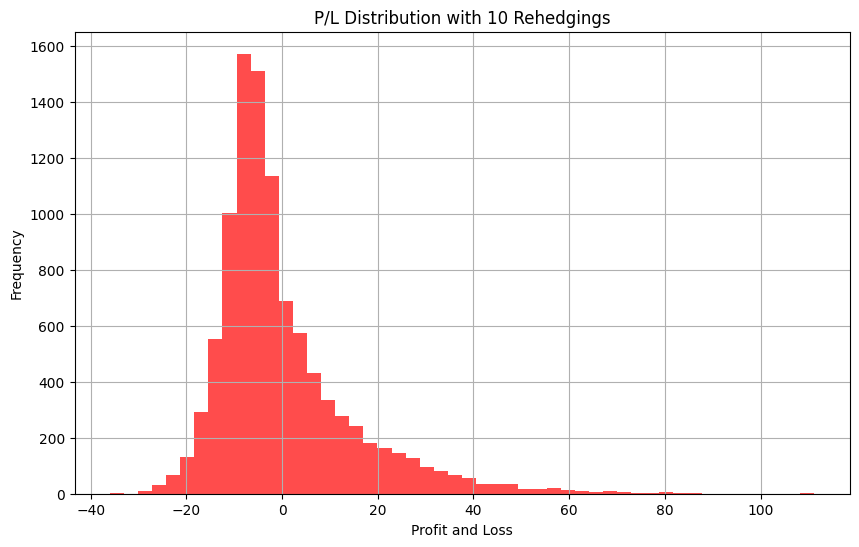

In [3]:
#**Question 2 (b):**
# Reducing rehedgings to 10
rehedge_steps = 10

#<--- delta-hedging with reduced rehedging (10 steps)
PnL_reduced_10 = np.zeros(n_paths)
for i in range(n_paths):
    delta_portfolio = 0
    for t in range(0, n_steps, n_steps // rehedge_steps):  # Equally spaced rehedgings
        delta = option_delta(stock_paths[i, t], initial_stock_price, T - t * dt, risk_free_rate, dividend_yield, implied_volatility)
        stock_price_change = stock_paths[i, t + n_steps // rehedge_steps] - stock_paths[i, t]
        PnL_reduced_10[i] += delta_portfolio * stock_price_change
        delta_change = delta - delta_portfolio
        transaction_cost_penalty = abs(delta_change * stock_paths[i, t]) * transaction_cost
        PnL_reduced_10[i] -= transaction_cost_penalty
        delta_portfolio = delta

#<--- calculating expected value and standard deviation of PnL for reduced rehedging (10 steps)
expected_PnL_10 = np.mean(PnL_reduced_10)
std_dev_PnL_10 = np.std(PnL_reduced_10)

#<--- results and plot histogram
print(f"Expected Value of P/L with 10 Rehedgings: {expected_PnL_10}")
print(f"Standard Deviation of P/L with 10 Rehedgings: {std_dev_PnL_10}")

plt.figure(figsize=(10, 6))
plt.hist(PnL_reduced_10, bins=50, color='red', alpha=0.7)
plt.title("P/L Distribution with 10 Rehedgings")
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Results for question 2. (b): Evaluation of Delta Hedging with 10 Rehedgings

When the hedging strategy is adjusted to only 10 rehedgings, the expected P/L shows a slight average gain of approximately **$0.04**. This contrasts with the strategy involving 100 rehedgings, which indicated a small average loss. Moreover, the standard deviation of P/L reduces to about **$14.39**, depicting a decrease in risk compared to the 100 rehedging steps.

The histogram for the 10 rehedgings strategy presents a more centralized distribution of outcomes around the small positive expected value, with a reduced frequency of extreme results. This approach suggests a more consistent performance with lower variability, which could be considered a more efficient strategy given the reduced risk and the shift from a negative to a positive expected return.

Expected Value of P/L with Trigger-based Rehedging: -0.25019406704507635
Standard Deviation of P/L with Trigger-based Rehedging: 15.727085914326965


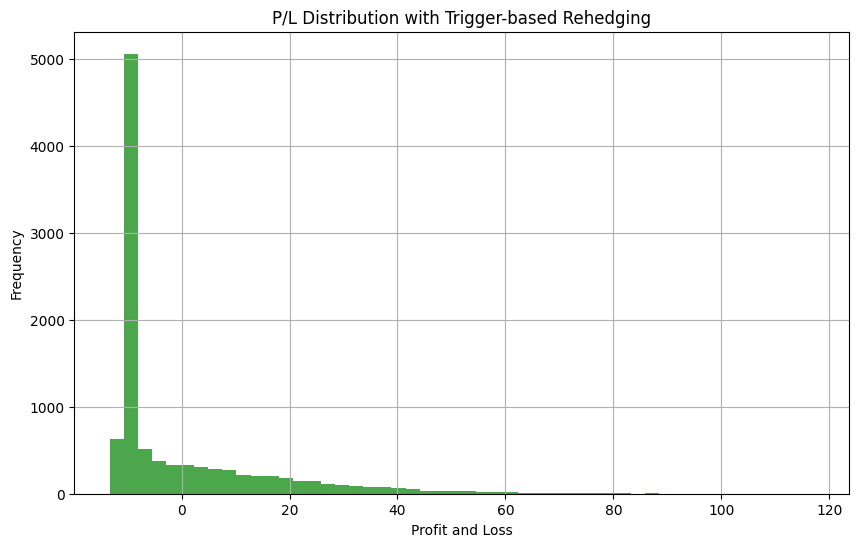

In [4]:
#**Question 2 (c):**
#<--- Trigger rehedging strategy
delta_trigger = 0.05  # Rebalance if delta changes by 5 percentage points

#<--- delta-hedging with trigger-based rehedging
PnL_trigger_based = np.zeros(n_paths)
for i in range(n_paths):
    delta_portfolio = 0
    last_delta = 0
    for t in range(n_steps):
        delta = option_delta(stock_paths[i, t], initial_stock_price, T - t * dt, risk_free_rate, dividend_yield, implied_volatility)
        if t == 0 or abs(delta - last_delta) >= delta_trigger:  # Check for trigger
            delta_change = delta - delta_portfolio
            transaction_cost_penalty = abs(delta_change * stock_paths[i, t]) * transaction_cost
            PnL_trigger_based[i] -= transaction_cost_penalty
            delta_portfolio = delta
            last_delta = delta
        stock_price_change = stock_paths[i, t + 1] - stock_paths[i, t]
        PnL_trigger_based[i] += delta_portfolio * stock_price_change

#<--- calculating expected value and standard deviation of PnL for trigger-based rehedging
expected_PnL_trigger = np.mean(PnL_trigger_based)
std_dev_PnL_trigger = np.std(PnL_trigger_based)

#<--- display results and plot histogram
print(f"Expected Value of P/L with Trigger-based Rehedging: {expected_PnL_trigger}")
print(f"Standard Deviation of P/L with Trigger-based Rehedging: {std_dev_PnL_trigger}")

plt.figure(figsize=(10, 6))
plt.hist(PnL_trigger_based, bins=50, color='green', alpha=0.7)
plt.title("P/L Distribution with Trigger-based Rehedging")
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### ## Results for question 2. (c): Insights on Trigger-based Rehedging Strategy

The trigger-based rehedging strategy, which involves portfolio rebalancing when delta changes by 5 percentage points, has an expected P/L of approximately **-$0.25**. This reflects a small average loss for each simulation, indicating that this method might not effectively capitalize on the volatility spread.

Moreover, the standard deviation of the P/L is about **$15.73**, which is comparable to the continuous rebalancing strategy, suggesting a similar risk level. The histogram displays a tight clustering of outcomes near zero but with a noticeable lean towards losses, confirming the negative expected value.

This trigger-based approach, despite potentially reducing transaction costs, does not seem to enhance the strategy's performance in terms of risk-adjusted returns. The negative expected value combined with a high standard deviation points to an inefficient balance, as the reduction in transaction costs does not appear to compensate adequately for the risks involved.

### Summary

  

Based on the analysis of the P/L distributons from the histograms and the expected values and standard deviations for each of the hedging strategies, we can draw the following conclusions to determine the superior outcome:

  

-  **Continuous Rebalancing (Question 1)**: This strategy showed a slight average gain **(Expected P/L: $0.22)** but came with a high level of risk **(Standard Deviation: $15.78)**.

-  **100 Rehedgings (2a)**: The strategy resulted in an average loss **(Expected P/L: -$0.17)** with a standard deviation **($15.70)** slightly lower than continuous rebalancing but still substantial.

-  **10 Rehedgings (2b)**: This method yielded a small average gain **(Expected P/L: $0.04)** and **presented the lowest standard deviation ($14.39)** among the strategies, indicating the least variability in P/L.

-  **Trigger-based Rehedging (2c)**: This approach showed an average loss **(Expected P/L: -$0.25)** and a **standard deviation ($15.73)** comparable to continuous rebalancing.

  

Considering the goal of achieving the highest expected P/L with the lowest standard deviation, the strategy with **10 rehedgings (2b)** stands out as the most efficient. It not only reverses the loss seen in 100 rehedgings and trigger-based strategies to a profit but also reduces the risk compared to the other strategies. Therefore, based on the given data, reducing the number of rehedgings to 10 provides a **superior outcome**.